In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',500)


In [62]:
data = pd.read_csv('my_data2.csv')

In [63]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [64]:
for column in data.columns:
    unique_value = data[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_value)
    print(f"Total Unique values in column '{column}':" , len(unique_value))
    print("\n")
    

Unique values in column 'CI_Name':
['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']
Total Unique values in column 'CI_Name': 3019


Unique values in column 'CI_Cat':
['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
Total Unique values in column 'CI_Cat': 13


Unique values in column 'CI_Subcat':
['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'Sha

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [66]:
data.isnull().sum()

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [67]:
data.describe()


,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [68]:
# Droping the column
data.drop(columns=['Reopen_Time', 'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'], inplace=True)

In [69]:
# Basic cleaning
data['CI_Cat'].fillna('Unknown', inplace=True)
data['CI_Subcat'].fillna('Unknown', inplace=True)

data['Priority'].fillna(data['Priority'].median(), inplace=True)
data['No_of_Reassignments'].fillna(0, inplace=True)

data['Open_Time'] = pd.to_datetime(data['Open_Time'], errors='coerce')
data['Resolved_Time'] = pd.to_datetime(data['Resolved_Time'], errors='coerce')
data['Close_Time'] = pd.to_datetime(data['Close_Time'], errors='coerce')

data['Resolved_Time'].fillna(data['Close_Time'], inplace=True)
data['Handle_Time_hrs'] = pd.to_numeric(data['Handle_Time_hrs'], errors='coerce')
data['Handle_Time_hrs'].fillna(data['Handle_Time_hrs'].mean(), inplace=True)
data['Closure_Code'].fillna('Unknown', inplace=True)
data['No_of_Related_Interactions'].fillna(0, inplace=True)


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  object        
 2   CI_Subcat                   46606 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      46606 non-null  object        
 7   Urgency                     46606 non-null  object        
 8   Priority                    46606 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

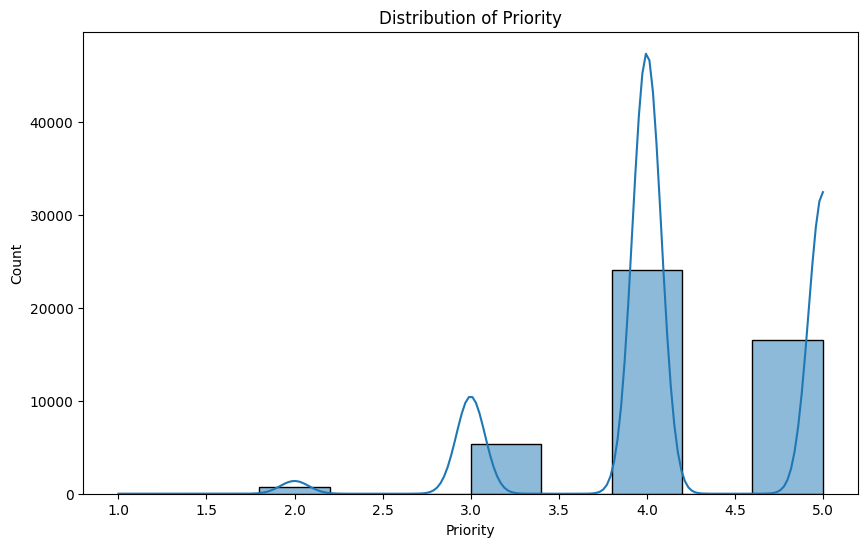

In [71]:
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Priority'], bins=10, kde=True)
plt.title('Distribution of Priority')
plt.show()

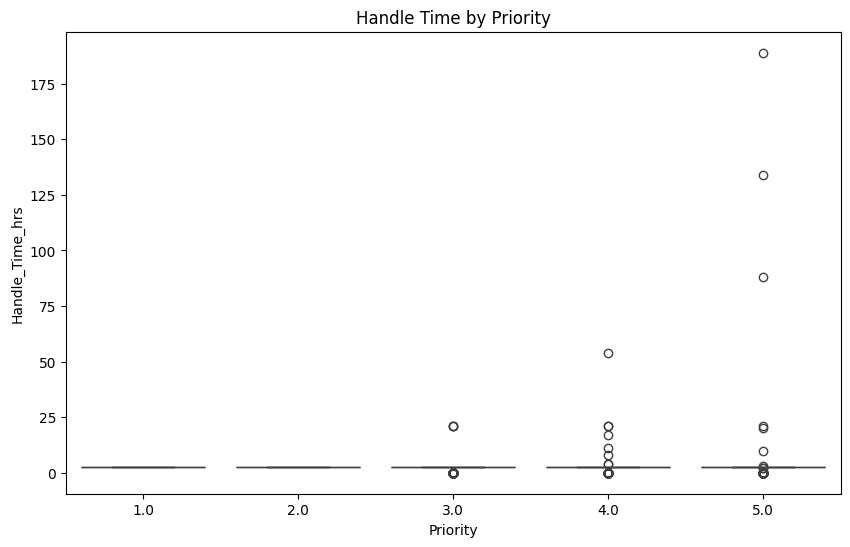

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Priority', y='Handle_Time_hrs', data=data)
plt.title('Handle Time by Priority')
plt.show()

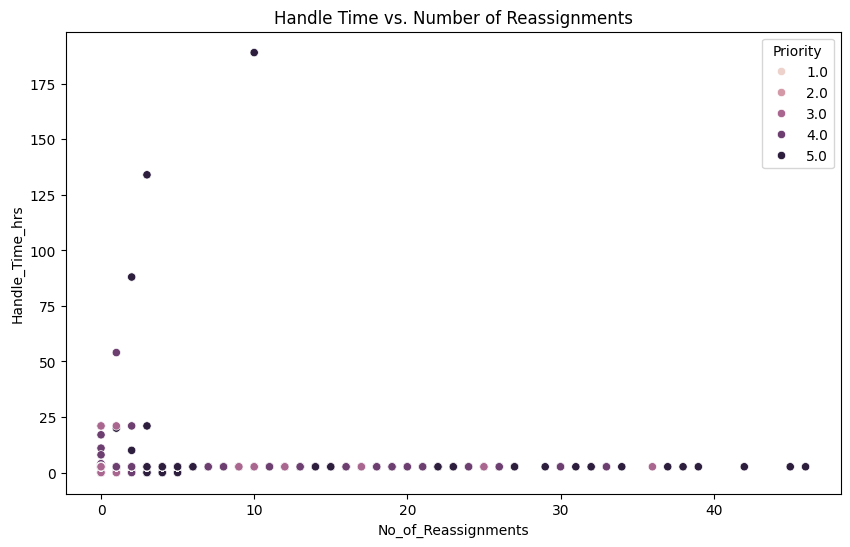

In [73]:
# Scatter plot to identify patterns or outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Reassignments', y='Handle_Time_hrs', hue='Priority', data=data)
plt.title('Handle Time vs. Number of Reassignments')
plt.show()

In [74]:
def handle_outliers(data, column, method='IQR', factor=1.5):
    if method == 'IQR':
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
    elif method == 'z-score':
        mean = data[column].mean()
        std = data[column].std()
        lower_bound = mean - factor * std
        upper_bound = mean + factor * std
    else:
        raise ValueError("Method should be either 'IQR' or 'z-score'")
    
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data



In [75]:
# Handling outliers in numerical columns
numerical_columns = ['Priority', 'No_of_Reassignments', 'Handle_Time_hrs', 'No_of_Related_Interactions']
for column in numerical_columns:
    data = handle_outliers(data, column, method='IQR', factor=1.5)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  object        
 2   CI_Subcat                   46606 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      46606 non-null  object        
 7   Urgency                     46606 non-null  object        
 8   Priority                    46606 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

In [77]:
data.describe()

,Priority,number_cnt,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,No_of_Related_Interactions
count,46606.000000,46606.000000,46606.000000,18612,18333,18333,46606.000,46606.0
mean,4.216989,0.499658,0.954620,2013-12-10 03:34:32.927143680,2013-12-15 14:00:25.442644224,2013-12-15 14:00:49.795450880,2.625,1.0
min,2.500000,0.000023,0.000000,2012-01-10 10:49:00,2013-01-10 06:45:00,2013-01-10 06:45:00,2.625,1.0
25%,4.000000,0.248213,0.000000,2013-06-11 11:40:45,2013-06-11 13:59:00,2013-06-11 13:59:00,2.625,1.0
50%,4.000000,0.500269,0.000000,2013-11-12 13:00:30,2013-12-11 07:52:00,2013-12-11 07:53:00,2.625,1.0
75%,5.000000,0.749094,2.000000,2014-06-02 18:22:30,2014-06-03 14:26:00,2014-06-03 14:27:00,2.625,1.0
max,5.000000,0.999997,5.000000,2014-12-03 22:58:00,2014-12-03 17:56:00,2014-12-03 17:56:00,2.625,1.0
std,0.674287,0.288634,1.458013,NaN,NaN,NaN,0.000,0.0


In [78]:
data.isna().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                     27994
Resolved_Time                 28273
Close_Time                    28273
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
dtype: int64

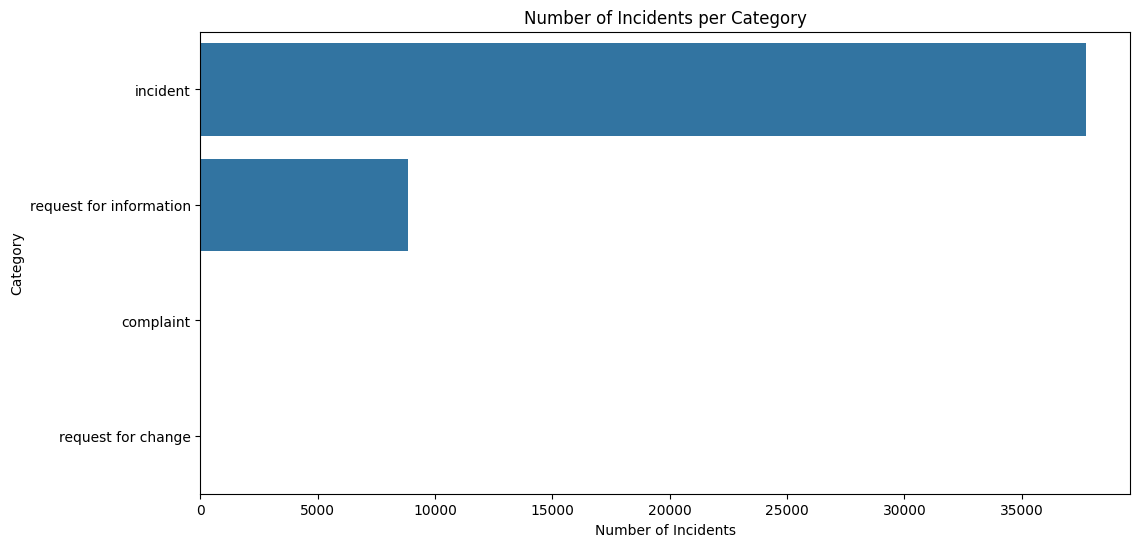

In [79]:
# Bar Plot for Category Counts
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=data, order=data['Category'].value_counts().index)
plt.title('Number of Incidents per Category')
plt.xlabel('Number of Incidents')
plt.ylabel('Category')
plt.show()

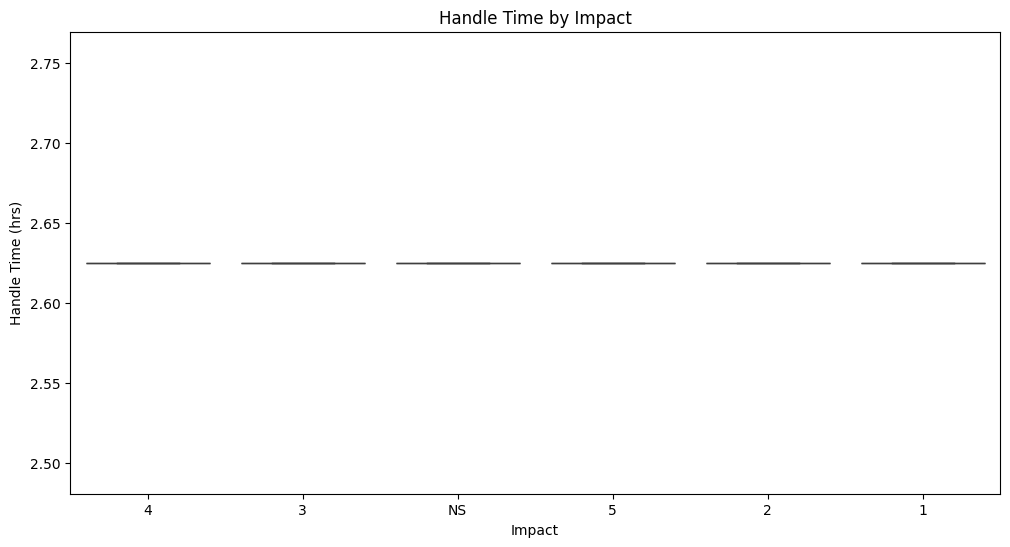

In [80]:
# Box Plot for Handle Time by Impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='Impact', y='Handle_Time_hrs', data=data)
plt.title('Handle Time by Impact')
plt.xlabel('Impact')
plt.ylabel('Handle Time (hrs)')
plt.show()


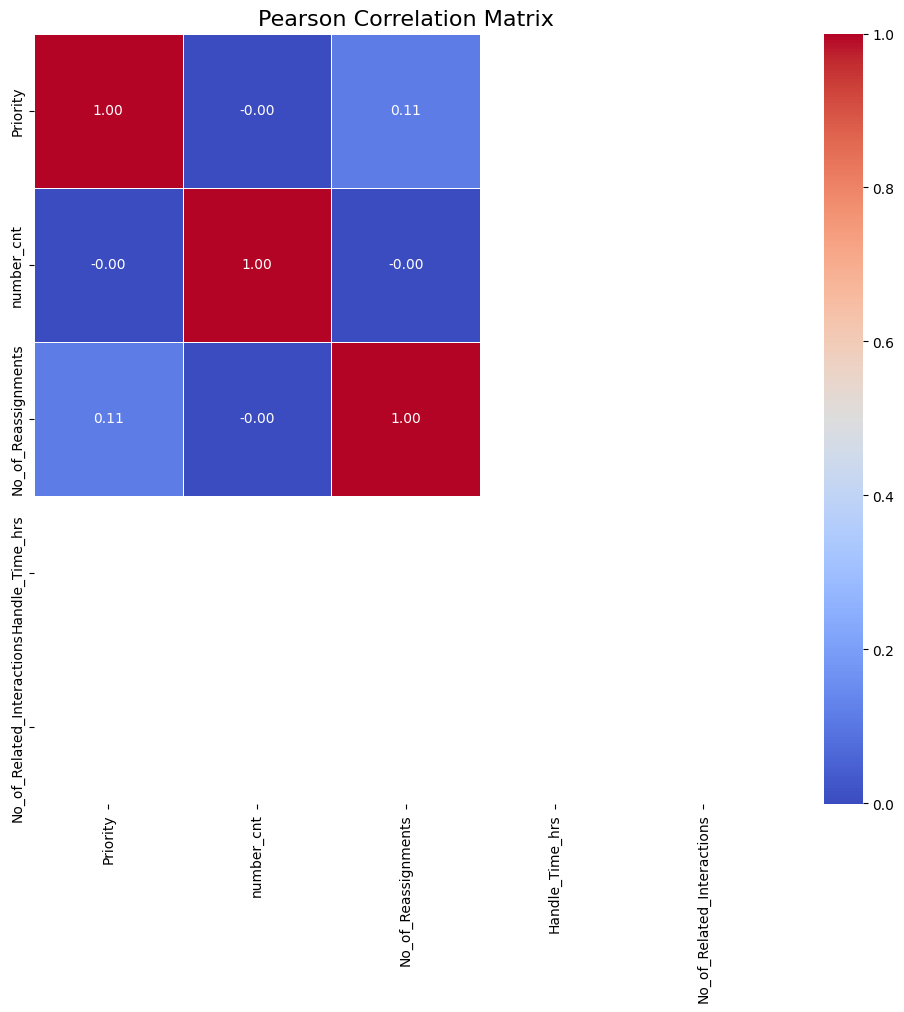

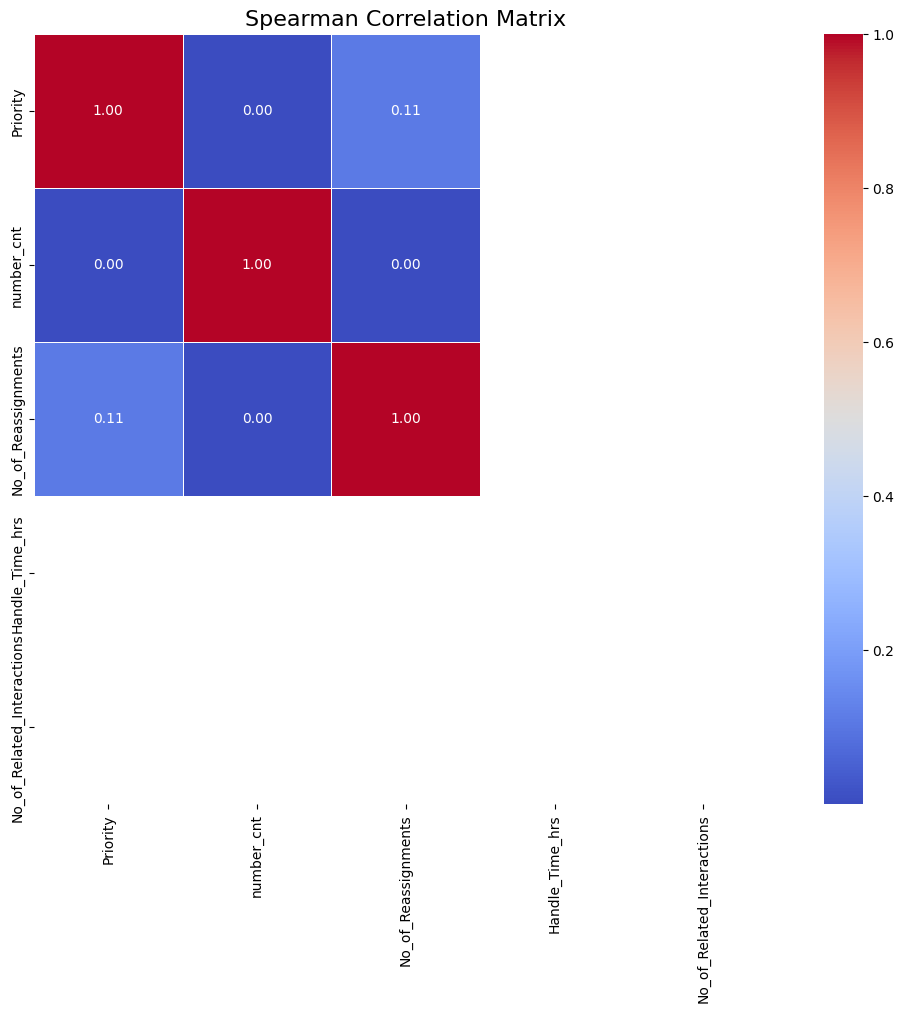

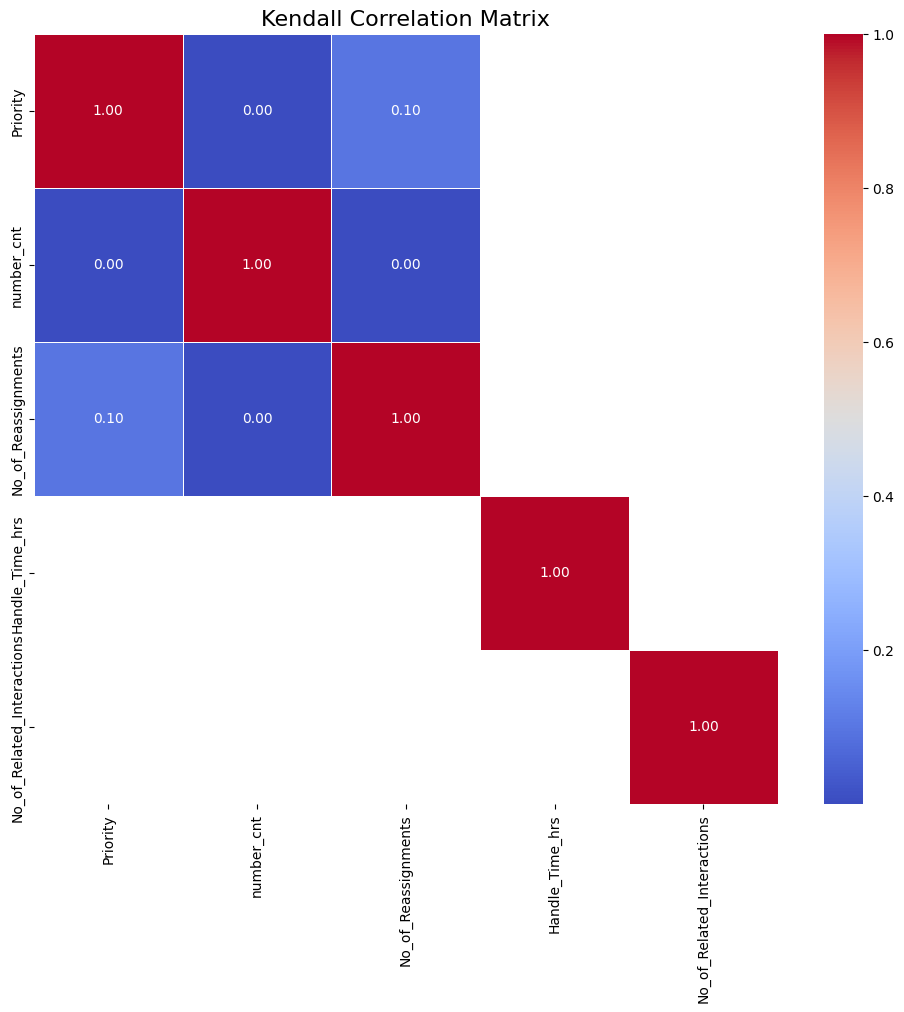

In [81]:
# Existing Code: Select numerical columns and plot Pearson correlation
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = data[numerical_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.show()

# Additional Code: Compute Spearman and Kendall correlations
spearman_corr = data[numerical_cols].corr(method='spearman')
kendall_corr = data[numerical_cols].corr(method='kendall')

# Plot Spearman Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix', fontsize=16)
plt.show()

# Plot Kendall Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(kendall_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Kendall Correlation Matrix', fontsize=16)
plt.show()


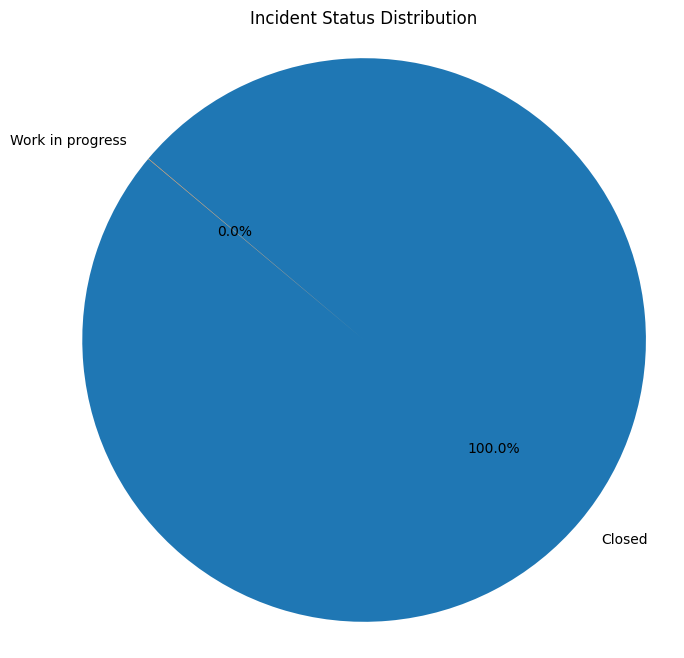

In [82]:
# Pie Chart for Incident Status Distribution
plt.figure(figsize=(8, 8))
status_counts = data['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Incident Status Distribution')
plt.axis('equal')
plt.show()


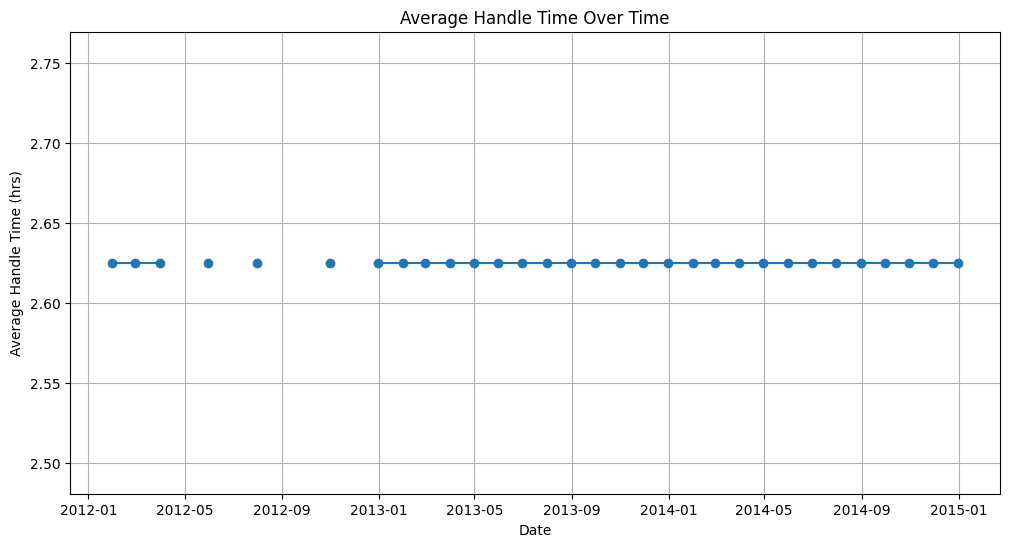

In [83]:
# Convert 'Open_Time' to datetime
data['Open_Time'] = pd.to_datetime(data['Open_Time'])

# Group by month and calculate the mean Handle_Time_hrs
monthly_avg_handle_time = data.groupby(pd.Grouper(key='Open_Time', freq='M'))['Handle_Time_hrs'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_handle_time.index, monthly_avg_handle_time.values, marker='o')
plt.title('Average Handle Time Over Time')
plt.xlabel('Date')
plt.ylabel('Average Handle Time (hrs)')
plt.grid(True)
plt.show()

In [84]:
data['Open_Time']

0       2012-05-02 13:32:00
1       2012-12-03 15:44:00
2                       NaT
3                       NaT
4       2012-10-08 11:01:00
                ...        
46601                   NaT
46602                   NaT
46603                   NaT
46604                   NaT
46605                   NaT
Name: Open_Time, Length: 46606, dtype: datetime64[ns]

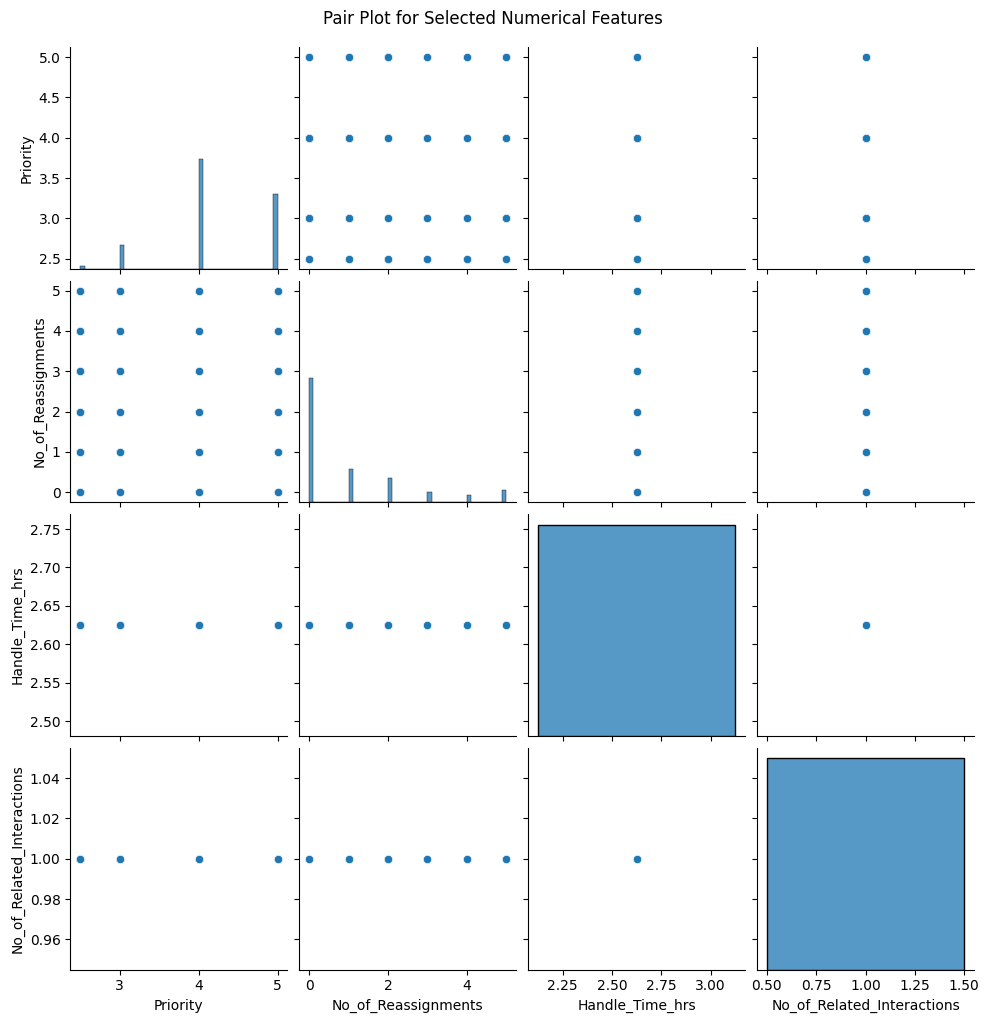

In [85]:
# Pair Plot for Selected Numerical Features
selected_columns = ['Priority', 'No_of_Reassignments', 'Handle_Time_hrs', 'No_of_Related_Interactions']
sns.pairplot(data[selected_columns])
plt.suptitle('Pair Plot for Selected Numerical Features', y=1.02)
plt.show()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  object        
 2   CI_Subcat                   46606 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      46606 non-null  object        
 7   Urgency                     46606 non-null  object        
 8   Priority                    46606 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

In [87]:

from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is categorical
        data[column] = data[column].astype(str)
        data[column] = label_encoder.fit_transform(data[column])
        print(f'Column "{column}" has been encoded.')

print("\nEncoded DataFrame:")
print(data)
    
    



Column "CI_Name" has been encoded.
Column "CI_Cat" has been encoded.
Column "CI_Subcat" has been encoded.
Column "WBS" has been encoded.
Column "Incident_ID" has been encoded.
Column "Status" has been encoded.
Column "Impact" has been encoded.
Column "Urgency" has been encoded.
Column "Category" has been encoded.
Column "KB_number" has been encoded.
Column "Alert_Status" has been encoded.
Column "Closure_Code" has been encoded.
Column "Related_Interaction" has been encoded.

Encoded DataFrame:
       CI_Name  CI_Cat  CI_Subcat  WBS  Incident_ID  Status  Impact  Urgency  \
0         2741      12         58  137            0       0       3        3   
1         2863       2         58   70            1       0       2        2   
2          990       2         10   74            2       0       5        2   
3         2863       2         58   70            3       0       3        3   
4         2863       2         58   70            4       0       3        3   
...        ...     ..

In [88]:
data.to_csv('preprocessed data.csv',index=False)

In [89]:
data1=pd.read_csv('preprocessed data.csv')

In [90]:
data1.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,2741,12,58,137,0,0,3,3,4.0,0.601292,1,413,0,5.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,2.625,6,1.0,2
1,2863,2,58,70,1,0,2,2,3.0,0.415050,1,456,0,5.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,2.625,10,1.0,3
2,990,2,10,74,2,0,5,2,4.0,0.517551,3,244,0,3.0,NaN,NaN,NaN,2.625,4,1.0,4
3,2863,2,58,70,3,0,3,3,4.0,0.642927,1,456,0,5.0,NaN,NaN,NaN,2.625,5,1.0,5
4,2863,2,58,70,4,0,3,3,4.0,0.345258,1,456,0,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,2.625,6,1.0,6


In [91]:
data1.isnull().sum()

CI_Name                           0
CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               0
Open_Time                     27994
Resolved_Time                 28273
Close_Time                    28273
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
Related_Interaction               0
dtype: int64

In [92]:
data1.shape

(46606, 21)

In [93]:

unique_values = sorted(data1['Priority'].dropna().unique())
mapping = {value: i for i, value in enumerate(unique_values, start=1)}

# Add mapping for NaN values if needed
mapping[np.nan] = -1  # Replace -1 with any other placeholder value if required

# Replace values in the series
data1['Priority'] = data1['Priority'].map(mapping).fillna(-1).astype(int)  # Or replace -1 with another placeholder




features = data[[
    "Impact",
    "Urgency",
    "Status",
    "No_of_Reassignments",
    "Handle_Time_hrs",
    "CI_Name",
    "CI_Cat",
    "CI_Subcat",
    "Alert_Status",
    "Category",
    "Closure_Code",
    "Related_Interaction"
]]  # Drop the target variable
target = data['Priority']  # Target variable


In [94]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)


       Impact  Urgency  Status  No_of_Reassignments  Handle_Time_hrs  CI_Name  \
24242       4        4       0                  1.0            2.625     2733   
9410        3        3       0                  0.0            2.625     2863   
24211       3        3       0                  0.0            2.625     2056   
43240       3        3       0                  0.0            2.625     2725   
36954       2        2       0                  1.0            2.625     2278   
...       ...      ...     ...                  ...              ...      ...   
11284       3        3       0                  5.0            2.625     2879   
44732       3        3       0                  0.0            2.625      920   
38158       3        3       0                  1.0            2.625     2487   
860         3        3       0                  1.0            2.625     2584   
15795       2        2       0                  0.0            2.625     2278   

       CI_Cat  CI_Subcat  A

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit the encoder and transform the labels
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(y_train_encoded)
print(y_test_encoded)

[3 2 2 ... 2 2 1]
[3 3 2 ... 2 0 2]


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
y_test dtype: float64
y_pred dtype: int64
y_test unique values: [2.5 3.  4.  5. ]
y_pred unique values: [0 1 2 3]
Confusion Matrix:
 [[ 210    0    0    0]
 [   0 1609    2    0]
 [   0    0 7204    0]
 [   0    0    0 4957]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      1611
           2       1.00      1.00      1.00      7204
           3       1.00      1.00      1.00      4957

    accuracy                           1.00     13982
   macro avg       1.00      1.00      1.00     13982
weighted avg       1.00      1.00      1.00     13982

Accuracy: 0.9998569589472178
Precision: 1.00
Recall: 1.00


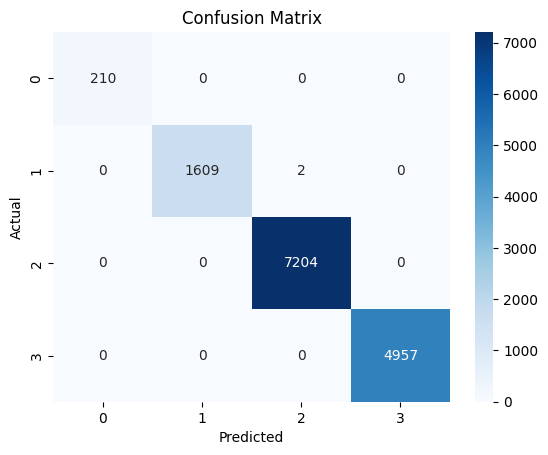

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score



# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_encoded)

# Best parameters and model
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


# Predictions and evaluation
y_pred = best_rf.predict(X_test)
print("y_test dtype:", y_test.dtype)
print("y_pred dtype:", y_pred.dtype)
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))

# Print classification report and confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
# Plot confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.99984672]
Mean CV Accuracy: 0.9999693439607602


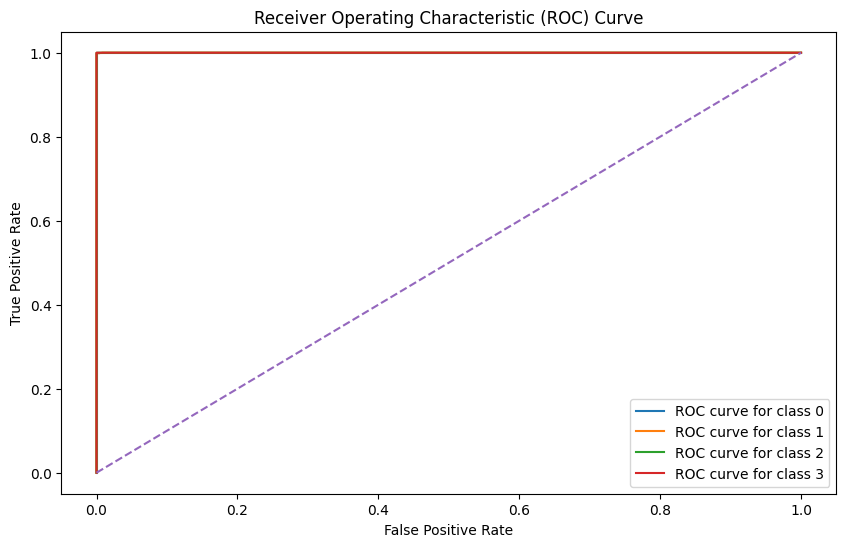

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Cross-validation score
cv_scores = cross_val_score(best_rf, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores)}")

# ROC-AUC score and curve
# Specify the 'multi_class' parameter as 'ovr' (one-vs-rest)
y_prob = best_rf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test_encoded, y_prob, multi_class='ovr')  # Specify the multi_class parameter

# Compute ROC curve for each class
fpr = {}
tpr = {}
for i in range(y_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_prob[:, i], pos_label=i)

# Plot ROC Curve for each class
plt.figure(figsize=(10, 6))
for i in range(y_prob.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [98]:
import pickle

# Save the model to a file
model_filename = 'priority_prediction_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(grid_search, file)

# Load the model (for deployment or later use)
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

Impact = int(input("enter the value between 1 to 6 :- "))

Urgency =int(input("enter the value between 1 to 11 :- "))

Status=int(input("enter the value between 1 or 2 :- "))

No_of_Reassignments=int(input("enter the value between 1 to 42 :- "))

Handle_Time_hrs = int(input("enter the value it must be  10 digit  :- "))

CI_Name = int(input("enter the value between 1 to 3019 :- "))

CI_Cat = int(input("enter the value between 1 to 13 :- "))

CI_Subcat = int(input("enter the value between 1 to 65 :- "))

Alert_Status = int(input("enter the value 1 :- "))

Category = int(input("enter the value between 1 to 4 :- "))

Closure_Code = int(input("enter the value between 1 to 15 :- "))

Related_Interaction = int(input("enter the value between 1 to 43060 :- "))


# Example prediction
example_data = [[Impact,Urgency,
Status,
No_of_Reassignments,
Handle_Time_hrs,
CI_Name,
CI_Cat,
CI_Subcat,
Alert_Status,
Category,
Closure_Code,
Related_Interaction]]  # Example feature values
predicted_priority = loaded_model.predict(example_data)
print(f"Predicted Priority: {predicted_priority[0]}")
for i in example_data:
    print(i)


Predicted Priority: 1
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
